# Aykırı Gözlem Analizi

## Aykırı Değerleri Yakalamak

In [1]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table = df["table"]

In [3]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

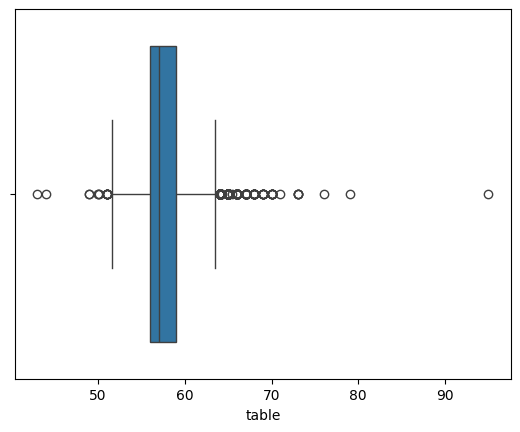

In [4]:
sns.boxplot(x = df_table);

In [6]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

In [7]:
Q1

56.0

In [8]:
Q3

59.0

In [9]:
IQR

3.0

In [10]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [11]:
alt_sinir

51.5

In [12]:
ust_sinir

63.5

In [13]:
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [14]:
aykiri_tf = (df_table < alt_sinir)

In [15]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [16]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [17]:
df_table[aykiri_tf].index

Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701, 25179,
       26387, 33586, 35633, 45798, 46040, 47630],
      dtype='int64')